In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X,y = load_iris(return_X_y = True)

In [5]:
iris_dataframe = pd.DataFrame(X,columns=['sepal length in cm','sepal width in cm','petal length in cm',\
                                         'petal width in cm'])
iris_dataframe['iris class']=y
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(0,'Iris-Setosa')
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(1,'Iris-Versicolour')
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(2,'Iris-Virginica')

In [6]:
iris_dataframe

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,iris class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-Virginica
146,6.3,2.5,5.0,1.9,Iris-Virginica
147,6.5,3.0,5.2,2.0,Iris-Virginica
148,6.2,3.4,5.4,2.3,Iris-Virginica


In [7]:
model_classification = LogisticRegression(random_state=0).fit(X,y)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
model_classification = LogisticRegression(random_state=0,max_iter = 1000).fit(X,y)

In [9]:
model_classification.intercept_

array([  9.84564074,   2.22864748, -12.07428822])

In [10]:
model_classification.coef_

array([[-0.42227753,  0.96524279, -2.51555607, -1.08174846],
       [ 0.53491083, -0.31944769, -0.20794854, -0.94037045],
       [-0.1126333 , -0.6457951 ,  2.72350461,  2.02211891]])

In [11]:
true_values = y
predictions = model_classification.predict(X)
f1_score(true_values,predictions,average='weighted')

0.9733226623982927

In [12]:
iris_dataframe.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'iris class'],
      dtype='object')

In [13]:
iris_dataframe.groupby('iris class').mean()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
iris class,,,,
Iris-Setosa,5.006,3.428,1.462,0.246
Iris-Versicolour,5.936,2.770,4.260,1.326
Iris-Virginica,6.588,2.974,5.552,2.026


In [21]:
data_input= pd.DataFrame(X, columns=['petal length in cm'])
data_output = iris_dataframe['iris class']

In [22]:
data_input

,petal length in cm
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [23]:
data_output

0         Iris-Setosa
1         Iris-Setosa
2         Iris-Setosa
3         Iris-Setosa
4         Iris-Setosa
            ...      
145    Iris-Virginica
146    Iris-Virginica
147    Iris-Virginica
148    Iris-Virginica
149    Iris-Virginica
Name: iris class, Length: 150, dtype: object

In [26]:
model_classification = LogisticRegression(random_state=0,max_iter = 1000).fit(data_input,data_output)

true_values = data_output
predictions = model_classification.predict(data_input)
print(f'F1 SCore: {f1_score(data_output,predictions,average='weighted')}')
print(f'Precision SCore: {precision_score(data_output,predictions,average='weighted')}')
print(f'Recall SCore: {recall_score(data_output,predictions,average='weighted')}')

F1 SCore: 0.9533286661999534
Precision SCore: 0.9534480458850206
Recall SCore: 0.9533333333333334


In [30]:
confusion_matrix(data_output,predictions)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  3, 47]], dtype=int64)

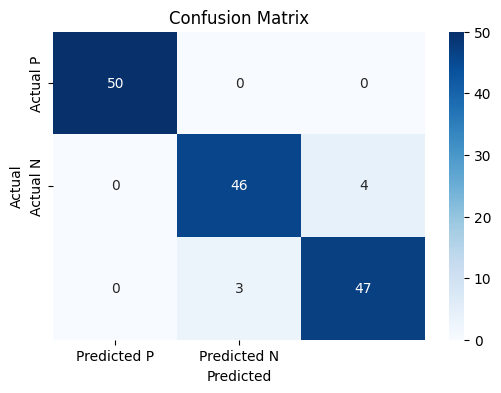

In [33]:
# Create the confusion matrix
cm = confusion_matrix(data_output, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted P', 'Predicted N'], yticklabels=['Actual P', 'Actual N'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(47/50)
print(46/50)
print(3/ ((50/50) + (50/46) + (50/47)))

0.94
0.92
0.9521432765707575
